In [1]:
import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('py/') 

from functions import initialize, get_points_within_target_region, df2gdf, plot_map
from preprocess import preprocess_data
from map_matching import map_match_csv2gpx, map_match_csv2gpx_multithread
from generate_route_by_pyroutelib import generate_osm_routes_main
from config import max_threads


#### Initialize system:
- remove old data
- create necessary directories

In [2]:
initialize()

Cleaning dirs: input/ and output/ 


#### Remove input points outside of target boundary

- ananymize ap_id column
- clip points within boundary

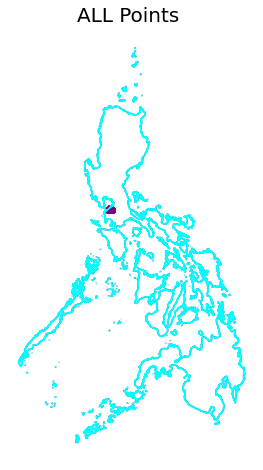

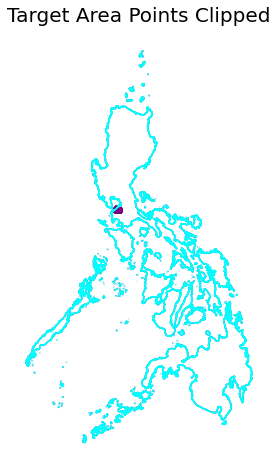

In [3]:
#gps_csv = 'raw_data/PHL_20000.csv'
#gps_csv = 'raw_data/PHL_10000.csv'
#gps_csv = 'raw_data/PHL_20190703_anonymized.csv'
gps_csv = 'raw_data/PHL_test_data.csv'
gdf_probe_clipped, gdf_target = get_points_within_target_region (gps_csv, anonymize=True, display_plot = True)
#gdf_probe_clipped.head()

#### Preprocess input points

In [4]:
# 1. cleaning data & applying sampling
df_sample = preprocess_data()
df_sample.head(2)

,ap_id,timestamp,latitude,longitude
0,3968,2020-01-01 01:14:33,14.33886,120.825128
1,3968,2020-01-01 04:05:27,14.33886,120.825128


In [5]:
#df_sample.drop_duplicates(['ap_id'])

## apply thread

### map matching with osm roads using graphhopper

In [6]:
# map matching
#df_mapped_route = map_match_csv2gpx(df_sample)
df_mapped_route = None 
if max_threads > 1:
    df_mapped_route = map_match_csv2gpx_multithread(df_sample)
else:
    df_mapped_route = map_match_csv2gpx(df_sample)



completed:  java -jar matching-web/target/graphhopper-map-matching-web-1.0-SNAPSHOT.jar import map-data/philippines-latest.osm.pbf
<< multithreaded_process() -> START 2020-11-04 10:40:15.764722
0  slice_start:  0 slice_end:  0
thread : 1 0
  slice_start:  0 slice_end:  0
thread :  Route Points cannot be generated as all the selected ap_id's have very few input data points


PLEASE PROVIDE NEW INPUT WITH SUFFICIENT DATA 


1
1  csv file prepared and saved in  /home/bidur/map_match_gps_data/input/csv/1
Current Working Directory  /home/bidur/map_match_gps_data/map-matching-master
GPX_DIR:  /home/bidur/map_match_gps_data/map-matching-master/matching-web/src/test/resources/target/1

 Thread #1 completed:  java -jar matching-web/target/graphhopper-map-matching-web-1.0-SNAPSHOT.jar match /home/bidur/map_match_gps_data/map-matching-master/matching-web/src/test/resources/target/1/*.gpx

convert_resgpx2csv -> /home/bidur/map_match_gps_data/output/res_csv/1
Matched gpx -> /home/bidur/map_match_g

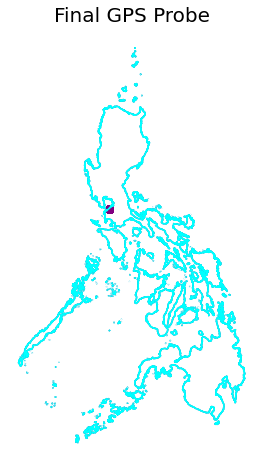

In [7]:
gdf_mapped = df2gdf(df_mapped_route)
plot_map(gdf_mapped, gdf_target, "Final GPS Probe") 

In [8]:
#generate_osm_routes_main( )